# Intelligent Placer #


## Подключение модулей

In [4]:
!pip install -r requirements.txt

Подключим необходимые модули:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread, imsave
from skimage.color import rgb2gray, label2rgb
from skimage.transform import hough_line, hough_line_peaks, warp, AffineTransform
from skimage.feature import canny, corner_harris, corner_peaks, corner_fast, corner_subpix, match_descriptors, ORB
from skimage.filters import roberts, sobel, scharr, prewitt, gaussian, threshold_otsu
from skimage import measure
from skimage.segmentation import watershed
from skimage.morphology import binary_closing, binary_erosion
from scipy import ndimage as ndi
import cv2
import os

import abc

import imghdr

Зададим директории:

In [2]:
path_to_items = "Images"
path_to_tests = "Tests"
path_to_ready_items = "Processed Items"

## Обработка фотографий объектов 

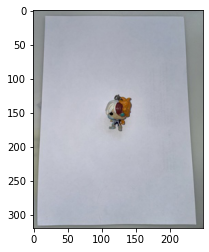

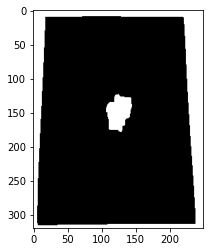

In [59]:
from skimage.morphology import binary_opening
from skimage.measure import regionprops
from skimage.measure import label as sk_measure_label

source_image_file = os.path.join("Images", "todoroki.jpg")
img = imread(source_image_file)
plt.imshow(img)
plt.show()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_blur_gray = rgb2gray(gaussian(img, sigma=1.5, channel_axis=True))
threshold_img = threshold_otsu(img_blur_gray)
result_image = img_blur_gray <= threshold_img
result_image = binary_closing(result_image, footprint=np.ones((20, 20)))
plt.imshow(result_image, cmap='gray')


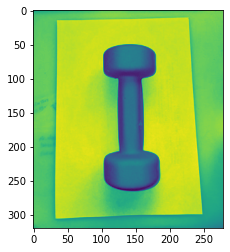

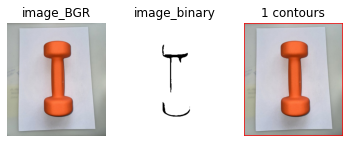

In [60]:
import cv2
import matplotlib.pyplot as plt
 
source_image_file = os.path.join("Images", "dumbbell.jpg")
image = imread(source_image_file)
image_BGR = image.copy()
 
 # Преобразование изображения в изображение в градациях серого, выполнение размытия по Гауссу и преобразование в двоичное изображение
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
blurred = cv2.GaussianBlur(gray, (5,5), 0)
image_binary = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
 
 # Извлечение контуров из двоичного изображения
 # contours содержит все обнаруженные контуры, а также точки координат каждого контура
contours = cv2.findContours(image_binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
 
 # Обведите все обнаруженные контуры и нарисуйте обнаруженные точки координат на изображении
 # Тип c numpy.ndarray, размерность (num, 1, 2), num указывает, сколько существует координатных точек
for c in contours:
    cv2.drawContours(image, [c], -1, (255, 0, 0), 2)
 
image_contours = image
 
# display BGR image
plt.subplot(1, 3, 1)
plt.imshow(image_BGR)
plt.axis('off')
plt.title('image_BGR')
 
# display binary image
plt.subplot(1, 3, 2)
plt.imshow(image_binary, cmap='gray')
plt.axis('off')
plt.title('image_binary')
 
# display contours
plt.subplot(1, 3, 3)
plt.imshow(image_contours)
plt.axis('off')
plt.title('{} contours'.format(len(contours)))
 
plt.show()
